In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
sports = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-04-07/tdf_winners.csv")

In [3]:
sports

,edition,start_date,winner_name,winner_team,distance,time_overall,time_margin,stage_wins,stages_led,height,weight,age,born,died,full_name,nickname,birth_town,birth_country,nationality
0,1,1903-07-01,Maurice Garin,La Française,2428.0,94.553889,2.989167,3,6,1.62,60.0,32,1871-03-03,1957-02-19,NaN,The Little Chimney-sweep,Arvier,Italy,France
1,2,1904-07-02,Henri Cornet,Conte,2428.0,96.098611,2.270556,1,3,NaN,NaN,19,1884-08-04,1941-03-18,NaN,Le rigolo (The joker),Desvres,France,France
2,3,1905-07-09,Louis Trousselier,Peugeot–Wolber,2994.0,NaN,NaN,5,10,NaN,NaN,24,1881-06-29,1939-04-24,NaN,Levaloy / Trou-trou,Paris,France,France
3,4,1906-07-04,René Pottier,Peugeot–Wolber,4637.0,NaN,NaN,5,12,NaN,NaN,27,1879-06-05,1907-01-25,NaN,NaN,Moret-sur-Loing,France,France
4,5,1907-07-08,Lucien Petit-Breton,Peugeot–Wolber,4488.0,NaN,NaN,2,5,NaN,NaN,24,1882-10-18,1917-12-20,Lucien Georges Mazan,Lucien Petit-Breton,Plessé,France,France
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,102,2015-07-04,Chris Froome,Team Sky,3360.3,84.770556,0.016944,1,16,1.86,69.0,30,1985-05-20,NaN,Christopher Clive Froome,Froomey,Nairobi,Kenya,Great Britain
102,103,2016-07-02,Chris Froome,Team Sky,3529.0,89.080000,0.067778,2,14,1.86,69.0,31,1985-05-20,NaN,Christopher Clive Froome,Froomey,Nairobi,Kenya,Great Britain
103,104,2017-07-01,Chris Froome,Team Sky,3540.0,86.348611,0.015000,0,15,1.86,69.0,32,1985-05-20,NaN,Christopher Clive Froome,Froomey,Nairobi,Kenya,Great Britain
104,105,2018-07-07,Geraint Thomas,Team Sky,3349.0,83.286944,0.016944,2,11,1.83,71.0,32,1986-05-25,NaN,Geraint Howell Thomas,G,Cardiff,Wales,Great Britain


In [23]:
sports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   edition        106 non-null    int64         
 1   start_date     106 non-null    datetime64[ns]
 2   winner_name    106 non-null    object        
 3   winner_team    106 non-null    object        
 4   distance       106 non-null    float64       
 5   time_overall   98 non-null     float64       
 6   time_margin    98 non-null     float64       
 7   stage_wins     106 non-null    int64         
 8   stages_led     106 non-null    int64         
 9   height         66 non-null     float64       
 10  weight         67 non-null     float64       
 11  age            106 non-null    int64         
 12  born           106 non-null    object        
 13  died           56 non-null     object        
 14  full_name      46 non-null     object        
 15  nickname       74 non-n

In [5]:
sports["start_date"]= pd.to_datetime(sports["start_date"], format="%Y-%m-%d")

**The winning time and how far the runner up is, i.e. how long did it take to win, with every edition. So in a sense checking, are there cyclist getting better bikes, or are they getting lazier**

In [6]:
# Winning time = Overall time of the participant + Margin time

sports["winning_time"]= sports["time_overall"]+sports["time_margin"]

In [7]:
sports["winning_time"]

0      97.543056
1      98.369167
2            NaN
3            NaN
4            NaN
         ...    
101    84.787500
102    89.147778
103    86.363611
104    83.303889
105    82.966944
Name: winning_time, Length: 106, dtype: float64

### team with the most wins

In [8]:
team= sports['winner_team'].value_counts().idxmax()
times= sports['winner_team'].value_counts().max()

print("The team with the most wins in the history of the tournament is",team ,"winning it", times)

The team with the most wins in the history of the tournament is France winning it 12


### Are there cyclist getting better bikes, or are they getting lazier?

In [9]:
sports["Decade"]= pd.cut(sports["start_date"].dt.year, bins=(range(1900,2021,10)), labels=range(1900,2020,10))

In [10]:
average_winning_time= sports.groupby("Decade")["winning_time"].mean()

In [11]:
average_winning_time

Decade
1900     97.956111
1910    215.234444
1920    210.843583
1930    148.105062
1940    147.869028
1950    130.881389
1960    121.895917
1970    111.229167
1980    100.876194
1990     96.835639
2000     86.880139
2010     86.059290
Name: winning_time, dtype: float64

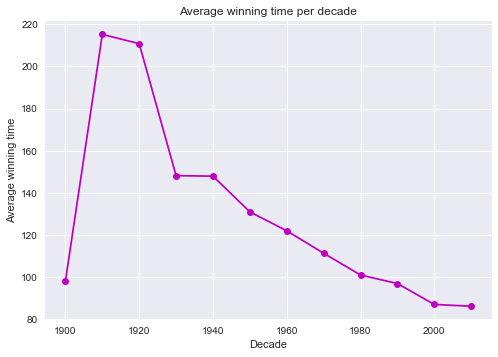

In [12]:
plt.style.use("seaborn")

average_winning_time.plot(marker="o", color="m")

plt.title("Average winning time per decade")
plt.ylabel("Average winning time")
plt.savefig("Average winning time per decade")

plt.show()

### The relationship between winners age and stages led 

In [13]:
w_s= sports[["stages_led","age"]]
age= w_s["age"]
print(age.max())
print(age.min())

36
19


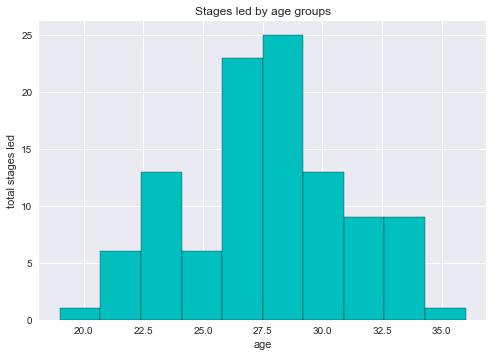

In [14]:
plt.style.use("seaborn")

bins= 10
plt.hist(age, edgecolor="black", bins=bins, color="c")

plt.title("Stages led by age groups")
plt.xlabel("age")
plt.ylabel("total stages led")
plt.savefig("Age group with the most wins")

plt.show()

### Sort by the most recent winning and find the winner's nationality and display the top.

In [15]:
# using unstack to create a DataFrame where each country is a column and each row is a decade.
winner =sports.groupby(["Decade","nationality"])["nationality"].count().unstack()
winners = winner.sum().sort_values(ascending=False).index
winner = winner[winners]
winner

nationality,France,Belgium,Spain,Italy,United States,Great Britain,Luxembourg,Netherlands,Switzerland,Australia,Colombia,Denmark,Germany,Ireland
Decade,,,,,,,,,,,,,,
1900,7,0,0,0,0,0,1,0,0,0,0,0,0,0
1910,1,5,0,0,0,0,0,0,0,0,0,0,0,0
1920,2,4,0,2,0,0,2,0,0,0,0,0,0,0
1930,5,3,0,1,0,0,0,0,0,0,0,0,0,0
1940,1,0,0,2,0,0,0,0,1,0,0,0,0,0
1950,5,0,1,2,0,0,1,0,1,0,0,0,0,0
1960,6,2,0,1,0,0,0,1,0,0,0,0,0,0
1970,4,4,1,0,0,0,0,1,0,0,0,0,0,0
1980,5,0,1,0,3,0,0,0,0,0,0,0,0,1


In [16]:
most_wins_country = winner.sum().sort_values(ascending=False).index[0]
print("The country with the most wins in the tournament is:", most_wins_country)

The country with the most wins in the tournament is:  France


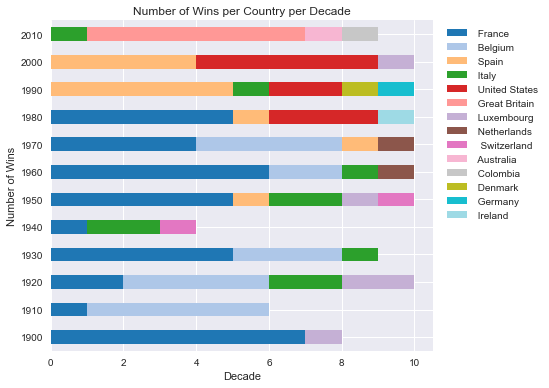

In [17]:
# The stacked=True argument stacks the bars on top of each other so that the height of each bar shows the total number of wins for each country in that decade.
# The cmap="tab20" argument sets the color map for the bars.

# get the unique decades
# decades = winners.index.get_level_values(0).unique()

winner.plot(kind="barh", stacked=True, cmap="tab20")

plt.xlabel("Decade")
plt.ylabel("Number of Wins")
plt.title("Number of Wins per Country per Decade")
plt.legend(bbox_to_anchor=(1.3, 1))
plt.tight_layout()
plt.savefig("Number of Wins per Country per Decade")
# set x-axis ticks and labels
# plt.xticks(range(len(decades)), decades)

plt.show()

In [19]:
# get the unique decades
decades = winner.index.get_level_values(0).unique()

In [20]:
decades

CategoricalIndex([1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990,
                  2000, 2010],
                 categories=[1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, ...], ordered=True, dtype='category', name='Decade')

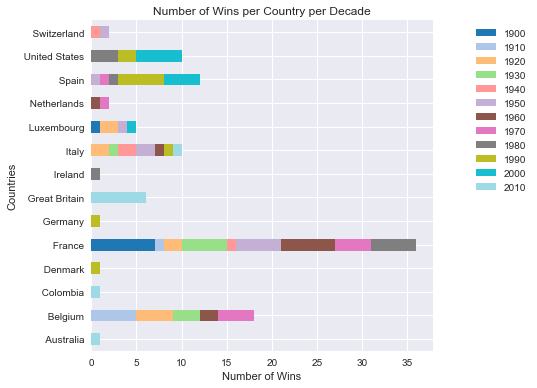

In [21]:
# create a multi-index by grouping by 'nationality' and 'Decade'
winners = sports.groupby(['nationality', 'Decade']).size()

# unstack the 'Decade' level to create columns
winners = winners.unstack(level='Decade')

# plot the horizontal bar chart
winners.plot(kind='barh', stacked=True, cmap='tab20')
plt.xlabel('Number of Wins')
plt.ylabel('Countries')
plt.title('Number of Wins per Country per Decade')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

# for containter in ax.containers:
#     ax.bar_label(containter)
plt.tight_layout()
# plt.show()

In [22]:
sports.to_csv("Sports_Cleaned.csv")